**The following are packages and user-defined functions with random number generators**

In [101]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as bs

a = 7**5
b = 0
m = 2**31-1

#This function generates uniform distribution
def f_unif(n,x_0):
    U = [None] * (n+1)
    U[0] = x_0
    i = 1
    while i < (n+1):
        U[i] = np.mod(a*U[i-1]+b,m)
        i = i+1
    del U[0]
    U = [x/m for x in U]
    return U

#This function generates normal distribution
def f_norm(n,U):
    Z_1 = [None]*n
    Z_2 = [None]*n
    for i in range(n):
        Z_1[i] = np.sqrt(-2*np.log(U[2*i]))*np.cos(2*math.pi*U[2*i+1])
        Z_2[i] = np.sqrt(-2*np.log(U[2*i]))*np.sin(2*math.pi*U[2*i+1])
        i = i + 1
    return Z_1+Z_2

def f_w(T,Z):
    W = [np.sqrt(T)*x for x in Z]
    return W


# Problem 1.

In [102]:
#1----------------------------------------
cov = -0.7
n = 1000

#cholesky decomposition
covM = np.array([[1,cov],[cov,1]])
L = np.linalg.cholesky(covM)

#set seed (x0)
np.random.seed(5)
x0 = np.random.randint(100,size = 2)

#generate 2 uniform distribution with 1000 observations in each
U1 = f_unif(n,x0[0])
U2 = f_unif(n,x0[1])
#generate 2 normal distribution with 1000 observations in each
x = 500
Z1 = f_norm(x,U1)
Z2 = f_norm(x,U2)

#create X and Y that used to generate 2 correlated normal distributions
X = [x*L[0,0] for x in Z1]
Y = [a+b for a,b in zip([y*L[1,0] for y in Z1], [y*L[1,1] for y in Z2])]

#calculate sampling mean of X and Y
Xe = np.mean(X); Ye = np.mean(Y)

#simulate rho
numerator = 0
VX = VY = 0
for i in range(n):    
    numerator = numerator + (X[i]-Xe)*(Y[i]-Ye)
    VX = VX + (X[i]-Xe)**2
    VY = VY + (Y[i]-Ye)**2
rho = numerator/(n-1) / (np.sqrt(VX/(n-1))*np.sqrt(VY/(n-1)))
print(rho)

-0.6913662593058951


D:\anaconda_distribution\Anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in int_scalars
  app.launch_new_instance()


$\rho$ is approximately -0.7.


# Problem 2.

In [103]:
#2----------------------------------------
cov = 0.6
covM = np.array([[1,cov],[cov,1]])
L = np.linalg.cholesky(covM)

#set seed (x0)
np.random.seed(1)
x0 = np.random.randint(100,size = 2)

#generate 2 uniform distribution with 1000 observations in each
U1 = f_unif(n,x0[0])
U2 = f_unif(n,x0[1])
#generate 2 normal distribution with 1000 observations in each
x = 500
Z1 = f_norm(x,U1)
Z2 = f_norm(x,U2)

#create X and Y that used to generate 2 correlated normal distributions
X = [x*L[0,0] for x in Z1]
Y = [a+b for a,b in zip([y*L[1,0] for y in Z1], [y*L[1,1] for y in Z2])]

E = [None]*n
for i in range(n):
    if (X[i]**3+np.sin(Y[i])+X[i]**2*Y[i]) > 0:
        E[i] = (X[i]**3+np.sin(Y[i])+X[i]**2*Y[i])
    else:
        E[i] = 0
E_mean = np.mean(E)
print(E_mean)

1.5289656039193773


D:\anaconda_distribution\Anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in int_scalars
  app.launch_new_instance()


Estimated value of $E[max(0,X^3+sin(Y)+X^2Y]$ is 1.53.


# Problem 3.

**(a)**

In [104]:
#3----------------------------------------
#a-----------
#set seed and generates uniform and normal distribution
x0_3 = 2
x = 500
U_3 = f_unif(n,x0_3)
Z_3 = f_norm(x,U_3)

#The following results are estimated by Monte Carlo Simulation 
W5 = f_w(5,Z_3)
E5 = np.array(W5)**2 + np.sin(W5)
E5_mean = np.mean(E5)
E5_v = np.sqrt(np.var(E5))

W05 = f_w(0.5,Z_3)
E05 = np.exp(0.5/2)*np.cos(W05)
E05_mean = np.mean(E05)
E05_v = np.sqrt(np.var(E05))

W32 = f_w(3.2,Z_3)
E32 = np.exp(3.2/2)*np.cos(W32)
E32_mean = np.mean(E32)
E32_v = np.sqrt(np.var(E32))

W65 = f_w(6.5,Z_3)
E65 = np.exp(6.5/2)*np.cos(W65)
E65_mean = np.mean(E65)
E65_v = np.sqrt(np.var(E65))

print(E5_mean, E05_mean, E32_mean, E65_mean)
print(E5_v, E05_v, E32_v, E65_v)

4.715685353777641 1.0194192307817886 1.1736742534509648 1.0528421655822626
7.571114466508359 0.34733827572240733 3.272860230200786 18.48038535552159


D:\anaconda_distribution\Anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in int_scalars
  app.launch_new_instance()


|value   |Ea1    |Ea2      |Ea3     |Ea4    |
|---------|---------|----------|---------|---------|
|Expected | 4.71568 | 1.01941  | 1.17367 | 1.05284 |
|error   | 7.57111 | 0.34733  | 3.27286 | 18.48038|

**(b).**

Observing values of Ea2, Ea3, Ea4, we can conclude that they are all very close to 1. <br>
This may indicate that the exact value of $E[e^{\frac{t}{2}}cos(W_t)]$ is 1.
<br>

**(c)Use variance reduction techniques**

Here we use the Control Variate method:

In [105]:
#c-----------
#Set control variate Y = W^2 where W is the corresponding 
#brownian motion for different T
ConV5 = np.array(W5)**2
cov5 = np.cov(np.array(E5),ConV5)
gamma5 = cov5[1,0]/np.var(ConV5)
T5 = np.array(E5) - gamma5*(ConV5-5)
T5_e = np.mean(T5)
T5_v = np.sqrt(np.var(T5))

ConV05 = np.array(W05)**2
cov05 = np.cov(np.array(E05),ConV05)
gamma05 = cov05[1,0]/np.var(ConV05)
T05 = np.array(E05) - gamma05*(ConV05-0.5)
T05_e = np.mean(T05)
T05_v = np.sqrt(np.var(T05))

ConV32 = np.array(W32)**2
cov32 = np.cov(E32,ConV32)
gamma32 = cov32[1,0]/np.var(ConV32)
T32 = E32 - gamma32*(ConV32-3.2)
T32_e = np.mean(T32)
T32_v = np.sqrt(np.var(T32))

ConV65 = np.array(W65)**2
cov65 = np.cov(E65,ConV65)
gamma65 = cov65[1,0]/np.var(ConV65)
T65 = E65 - gamma65*(ConV65-6.5)
T65_e = np.mean(T65)
T65_v = np.sqrt(np.var(T65))

print(T5_e, T05_e, T32_e, T65_e)
print(T5_v, T05_v, T32_v, T65_v)

5.009442721021386 1.0064266518583218 1.098125650994369 0.8775578950787397
0.6996982107601377 0.09730750463381024 2.63678518983461 17.924554721519904


The expected values and corresponding error are shown as following:

|MC |Expected |error    |VR  |Expected |error   |
|---|---------|----------|----|---------|---------|
|a1 | 4.71568 | 7.57111  | b1 | 5.00944 | 0.69969 |
|a2 | 1.01941 | 0.34733  | b2 | 1.00642 | 0.09730 |
|a3 | 1.17367 | 3.27286  | b3 | 1.09812 | 2.63678 |
|a4 | 1.05284 | 18.48038 | b4 | 0.87755 | 17.92455|

By looking at the expected value, Eb1, Eb2, Eb3 are significantly improved. Only Eb4 does not have obvious improvement.
<br>
By looking at the error, all results are improved, especially Eb1 and Eb2.

# Problem 4

**(a)Using Monte Carlo Simulation to estimate the European Call Option**

In [106]:
#4----------------------------------------
#a---------------
n = 1000
Call = [None]*n
S0 = 88
sigma = 0.2
r = 0.04
K = 100
T = 5
u = f_unif(n,1)
z = f_norm(500,u)
w = f_w(T,z)

#simulate the stock price at time T
ST = S0*np.exp(sigma*np.array(w)+(r-(sigma**2/2))*T)

#generate call option price
for i in range(n):
    if (ST[i]-K) > 0:
        Call[i] = ST[i]-K
    else:
        Call[i] = 0
c = np.mean(np.array(Call)*np.exp(-r*T))

print(c)

17.494260392677816


D:\anaconda_distribution\Anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in int_scalars
  app.launch_new_instance()


Estimated price of the call option is 17.49 <br>

**(b)Use variance reduction techniques**

Here we use the Antithetic Variates method:

In [107]:
#b---------------
z1 = f_norm(500,u)
z2 = [-x for x in z1]
w1 = f_w(T,z1)
w2 = f_w(T,z2)
x1 = S0*np.exp(sigma*np.array(w1)+(r-(sigma**2/2))*T)
x2 = S0*np.exp(sigma*np.array(w2)+(r-(sigma**2/2))*T)
ST_red1 = [None]*n
ST_red2 = [None]*n
for i in range(n):
    if (x1[i]-K) > 0:
        ST_red1[i] = x1[i]-K
    else:
        ST_red1[i] = 0
    if (x2[i]-K) > 0:
        ST_red2[i] = x2[i]-K
    else:
        ST_red2[i] = 0
c_red1 = np.array(ST_red1)*np.exp(-r*T)
c_red2 = np.array(ST_red2)*np.exp(-r*T)
c_red = np.mean((np.array(c_red1)+np.array(c_red2))/2)
print(c_red)

#Using Black-Scholes formula
d1 = (np.log(S0/K) + (r+(sigma**2)/2)*T)/(sigma*np.sqrt(T))
d2 = d1 - sigma*np.sqrt(T) 
F = S0*bs.norm.cdf(d1) - np.exp(-r * T)*K*bs.norm.cdf(d2)
print(F)

18.172097162958003
18.28376570485581


Based on the Black-Scholes formula, the exact value this option is 18.28.
<br>
Using the Antithetic Variates method, the call option price is 18.17; Monte Carlo simulation gives a price of 17.49.
<br>
Thus, there is a great improvement by using the variance reduction technique.

# Problem 5.

**(a)**

D:\anaconda_distribution\Anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in int_scalars
  app.launch_new_instance()


when sigma = 0.18, ESn are [ 88.          92.02321065  95.96074736 100.02376747 104.23668356
 108.6128875  113.16269903 117.89534309 122.81966241 127.94443486
 133.27853758]


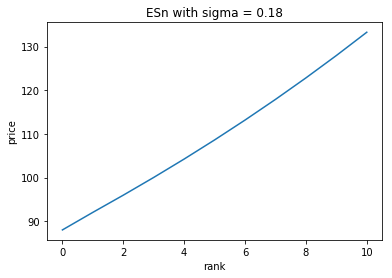

In [108]:
#5----------------------------------------
#a-------------
n = 1000
S0 = 88
sigma = 0.18
r = 0.04
U10 = f_unif(n,2870)
Z10 = f_norm(500,U10)
W10 = np.zeros((10,n))
S10 = np.zeros((10,n))
E10 = np.zeros(11)

#simulate Sn for n ranging from 1 to 10
for i in range(10):
    W10[i,:] = np.sqrt(i+1)*np.array(Z10)
    S10[i,:] = S0*np.exp(sigma*W10[i,:]+(r-(sigma**2/2))*(i+1))
    E10[i+1] = np.mean(S10[i,:])

E10[0] = S0
plt.figure()
ax1 = plt.plot(E10)
plt.xlabel("rank")
plt.ylabel("price")
plt.title("ESn with sigma = 0.18")
print("when sigma = 0.18, ESn are",E10)

**(b)Simulate 6 paths**

D:\anaconda_distribution\Anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in int_scalars
  app.launch_new_instance()


Text(0.5, 1.0, '6 paths with sigma = 0.18')

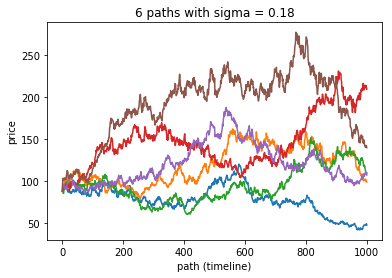

In [109]:
#b-------------
incre = np.sqrt(10/n)
sim6 = np.zeros((6,n+1))
Wincre = np.zeros((10,n))

plt.figure()
#simulate 6 paths of the change of the option price from time 0 to time T
for i in range(6):
    Zincre = f_norm(500,f_unif(n,(i+1)))
    Wincre[i,0] = incre*Zincre[0]
    for j in range(1,n):
        Wincre[i,j] = Wincre[i,j-1] + incre*np.array(Zincre[j])
    sim6[i,1:(n+1)] = S0*np.exp(sigma*Wincre[i,:]+(r-(sigma**2/2))*(i+1))
    sim6[i,0] = S0
    ax2 = plt.plot(sim6[i,:])
plt.xlabel("path (timeline)")
plt.ylabel("price")
plt.title("6 paths with sigma = 0.18")

**(c)Combine 2 plots**

Text(0.5, 1.0, 'Option Price with sigma = 0.18')

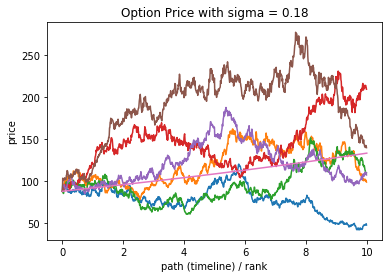

In [110]:
#c-------------
t = np.arange(0,10,10/1001)
plt.figure()
for i in range(6):
    plt.plot(t,sim6[i,:])
ax3 = plt.plot(E10)
plt.xlabel("path (timeline) / rank")
plt.ylabel("price")
plt.title("Option Price with sigma = 0.18")

**(d)Now increase $\sigma$ from 18% to 35%**

D:\anaconda_distribution\Anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in int_scalars
  app.launch_new_instance()


when sigma = 0.35, ESn are [ 88.          92.42540791  96.5749635  100.83963811 105.25548594
 109.8386506  114.59971034 119.54711969 124.68840022 130.03064428
 135.58075816]


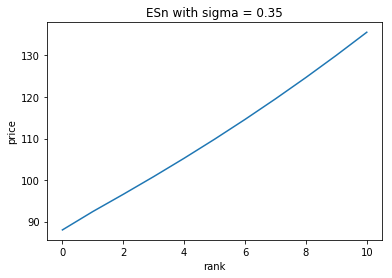

In [111]:
#d-------------
n = 1000
S0 = 88
sigma = 0.35
r = 0.04
U10 = f_unif(n,2870)
Z10 = f_norm(500,U10)
W10 = np.zeros((10,n))
S10 = np.zeros((10,n))
E10 = np.zeros(11)

for i in range(10):
    W10[i,:] = np.sqrt(i+1)*np.array(Z10)
    S10[i,:] = S0*np.exp(sigma*W10[i,:]+(r-(sigma**2/2))*(i+1))
    E10[i+1] = np.mean(S10[i,:])
E10[0] = S0
plt.figure()
ax4 = plt.plot(E10)
plt.xlabel("rank")
plt.ylabel("price")
plt.title("ESn with sigma = 0.35")
print("when sigma = 0.35, ESn are",E10)

D:\anaconda_distribution\Anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in int_scalars
  app.launch_new_instance()


Text(0.5, 1.0, 'Option Price with sigma = 0.35')

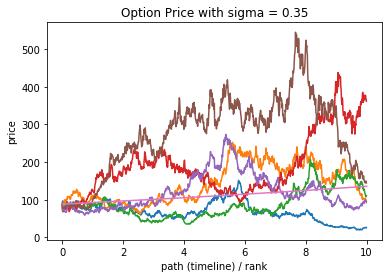

In [112]:
incre = np.sqrt(10/n)
sim6 = np.zeros((6,n+1))
Wincre = np.zeros((10,n))


for i in range(6):
    Zincre = f_norm(500,f_unif(n,(i+1)))
    Wincre[i,0] = incre*Zincre[0]
    for j in range(1,n):
        Wincre[i,j] = Wincre[i,j-1] + incre*np.array(Zincre[j])
    sim6[i,1:(n+1)] = S0*np.exp(sigma*Wincre[i,:]+(r-(sigma**2/2))*(i+1))
    sim6[i,0] = S0

t = np.arange(0,10,10/1001)
plt.figure()
for i in range(6):
    plt.plot(t,sim6[i,:])
ax5 = plt.plot(E10)
plt.xlabel("path (timeline) / rank")
plt.ylabel("price")
plt.title("Option Price with sigma = 0.35")

Since the risk ($\sigma$) of the option increases significantly, the $ES_n$ grows faster and the price of the option is much more volatile.

# Problem 6.

**(a)Using Euler's Method**

In [113]:
#6----------------------------------------
#a-------------
#using Euler's discretization scheme
n = 1000
I = 1/n
Euler = 0
for i in range(n):
    Euler = Euler + np.sqrt(1-(I*(i+1))**2)*I
Euler = Euler * 4
print(Euler)

3.1395554669110277


Using Euler's method, the integral is approximately 3.14 <br>

**(b)Using the Monte Carlo Simulation**

In [114]:
#b-------------
Uint = f_unif(n,5)
Monte = np.zeros(n)
for i in range(n):
    Monte[i] = 4*np.sqrt(1-Uint[i]**2)
MonteE = np.mean(Monte)
Monte_error = np.sqrt(np.var(Monte))
print(MonteE,Monte_error)

3.0964034571314283 0.9209680550482983


D:\anaconda_distribution\Anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in int_scalars
  app.launch_new_instance()


Using the Monte Carlo Simulation, the integral is approximately 3.10 with an error of 0.92. <br>

**(c)Using the Important Sampling method**

In [115]:
#c-------------
alpha = 0.74
h = (1-alpha*np.array(Uint)**2)/(1-alpha/3)

#using Acceptance-Rejection algorithm
u_test = f_unif(n,3)
U_select = np.zeros(n)
H = np.zeros(n)
for i in range(n):
    if u_test[i] <= h[i]/1.33:
        H[i] = h[i]
        U_select[i] = Uint[i]
H = [x for x in H if not x==0]
U_select = [x for x in U_select if not x==0]
Imp = (np.sqrt(1-np.array(U_select)**2))/np.array(H)
ImpE = 4*np.mean(Imp)
Imperror = np.sqrt(4*np.var(Imp))
print(ImpE, Imperror)

3.1465652971066445 0.11021834022421882


D:\anaconda_distribution\Anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in int_scalars
  app.launch_new_instance()


Using the Important Sampling method, the integral is approximately 3.144 with an error of 0.11.<br>
Compared to the Monte Carlo simulation, there is a significant improvement both in expected value and error.